# Map styling

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pickle

In [59]:
country_dict = pickle.load(open('country_dict.p', 'rb'))

In [60]:
# This function draws the country with a given ISO code
def draw_country(iso_code):
    fig = plt.figure(figsize=(9.8, 5.25), frameon=True, facecolor="#f0f0ed")
    global country_dict
    rows = country_dict[iso_code]['rows']
    cols = country_dict[iso_code]['cols']
    for i, p in enumerate(country_dict[iso_code]['parts']):
        ax = plt.subplot2grid(
            shape=(rows, cols), 
            loc=(p['rowroot'], p['colroot']),
            colspan=p['colspan'],
            rowspan=p['rowspan'],
        )
        if iso_code == "KIR":
            edgecolor = "black"
        else:
            edgecolor = None
        p['geometry'].plot(ax=ax, facecolor='#c7c7c4', edgecolor=edgecolor)
        plt.axis('equal')
        if i > 0 or iso_code == "KIR":
            plt.xlabel(p['name'], fontsize=11, labelpad=0)
            ax.xaxis.set_major_formatter(NullFormatter())
            ax.xaxis.set_ticks_position('none')
            ax.yaxis.set_major_formatter(NullFormatter())
            ax.yaxis.set_ticks_position('none')
        else:
            ax.set_axis_off()
        ax.set_facecolor("#f0f0ed")
    if iso_code == "KIR":
        ax_top = plt.subplot2grid(
            shape=(rows, cols), 
            loc=(0, 0),
            colspan=3,
            rowspan=1,
        )
        ax_bottom = plt.subplot2grid(
            shape=(rows, cols), 
            loc=(4, 0),
            colspan=3,
            rowspan=1,
        )
        ax_top.set_axis_off()
        ax_bottom.set_axis_off()
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.savefig('foo.png', facecolor="#f0f0ed", bbox_inches='tight', pad_inches=0.3);

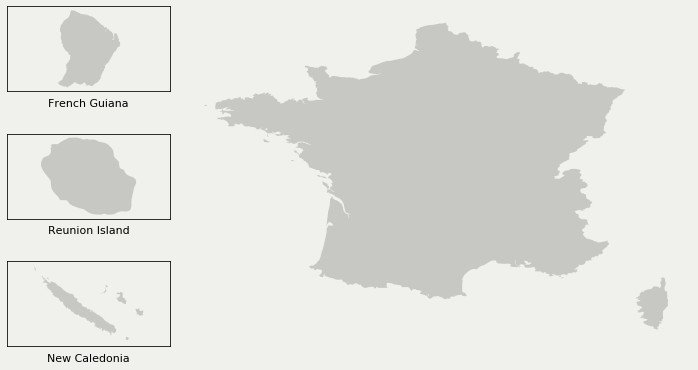

In [62]:
draw_country('FRA')

### Serializing the data

In [36]:
import json
import pickle
from shapely.geometry import mapping

In [37]:
country_dict = pickle.load(open('country_dict.p', 'rb'))

In [38]:
serialized_country_dict = country_dict.copy()
for country_code in serialized_country_dict:
    serialized_country_dict[country_code]['parts'] = [{key: val if key != 'geometry' else mapping(val)["features"][0]["geometry"] for key, val in part.items()}for part in serialized_country_dict[country_code]['parts']]

In [39]:
json.dump(serialized_country_dict, open('country.json', 'w'))

### De-serializing the data

In [40]:
import json
import geopandas as gpd
from shapely.geometry import shape

In [41]:
serialized_country_dict = json.loads(open('country.json').read())

In [42]:
serialized_country_dict = json.loads(open('country.json').read())
country_dict = serialized_country_dict["CHE"]
json.dump(country_dict, open('switzerland.json', 'w'))

In [94]:
deserialized_country_dict = serialized_country_dict.copy()
for country_code in deserialized_country_dict:
    deserialized_country_dict[country_code]['parts'] = [{key: val if key != 'geometry' else gpd.GeoSeries(shape(val).buffer(0), crs=4326) for key, val in part.items()} for part in deserialized_country_dict[country_code]['parts']]

In [95]:
deserialized_country_dict

{'AFG': {'name': 'Afghanistan',
  'ISO': 'AFG',
  'nr_parts': 1,
  'rows': 1,
  'cols': 1,
  'parts': [{'name': 'Afghanistan',
    'main': True,
    'geometry': 0    POLYGON ((74.54235396300002 37.02166900600012,...
    dtype: object,
    'rowroot': 0,
    'colroot': 0,
    'rowspan': 1,
    'colspan': 1}]},
 'ALB': {'name': 'Albania',
  'ISO': 'ALB',
  'nr_parts': 1,
  'rows': 1,
  'cols': 1,
  'parts': [{'name': 'Albania',
    'main': True,
    'geometry': 0    POLYGON ((20.56714725800009 41.87318166200001,...
    dtype: object,
    'rowroot': 0,
    'colroot': 0,
    'rowspan': 1,
    'colspan': 1}]},
 'DZA': {'name': 'Algeria',
  'ISO': 'DZA',
  'nr_parts': 1,
  'rows': 1,
  'cols': 1,
  'parts': [{'name': 'Algeria',
    'main': True,
    'geometry': 0    POLYGON ((-4.821613117999902 24.99506459600007...
    dtype: object,
    'rowroot': 0,
    'colroot': 0,
    'rowspan': 1,
    'colspan': 1}]},
 'AND': {'name': 'Andorra',
  'ISO': 'AND',
  'nr_parts': 1,
  'rows': 1,
  'cols': 1,

### Plotting the map for France

In [52]:
import geopandas as gpd
from shapely.geometry import shape
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [53]:
country_dict = json.loads(open('switzerland.json').read())

In [54]:
country_dict['parts'] = [{key: val if key != 'geometry' else gpd.GeoSeries(shape(val).buffer(0),
                                                                           crs=4326)
                          for key, val in part.items()} for part in country_dict['parts']]

In [55]:
country_dict['parts']

[{'name': 'Switzerland',
  'main': True,
  'geometry': 0    POLYGON ((10.45381107600014 46.86442738900006,...
  dtype: object,
  'rowroot': 0,
  'colroot': 0,
  'rowspan': 1,
  'colspan': 1}]

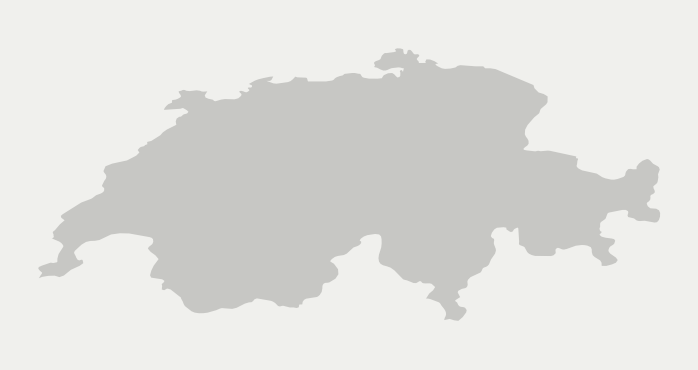

In [57]:
fig = plt.figure(figsize=(9.8, 5.25), frameon=True, facecolor="#f0f0ed")
rows = country_dict['rows']
cols = country_dict['cols']
for p in country_dict['parts']:
    ax = plt.subplot2grid(
            shape=(rows, cols), 
            loc=(p['rowroot'], p['colroot']),
            colspan=p['colspan'],
            rowspan=p['rowspan'],
        )
    p['geometry'].plot(ax=ax, facecolor='#c7c7c4', edgecolor=None)
    ax.axis('equal')
    if not p['main']:
        plt.xlabel(p['name'], fontsize=11, labelpad=0)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_ticks_position('none')
    else:
        ax.set_axis_off()
    ax.set_facecolor("#f0f0ed")
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()